In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

In [2]:
train_csvs = glob.glob('/home/zg2309/result/training*/*/data_smooth.csv')

val_ratio = 0.1
train_csv_num = len(train_csvs)

val_num = int(train_csv_num * val_ratio)
train_num = train_csv_num - val_num

random.shuffle(train_csvs)

split_train_csvs = train_csvs[:train_num]
val_csvs = train_csvs[train_num:]
train_csvs = split_train_csvs

# print(train_csvs)
# print(val_csvs)
print('train csv num:', len(train_csvs))
print('val csv num:', len(val_csvs))

train csv num: 715
val csv num: 79


In [3]:
test_csvs = glob.glob('/home/zg2309/result/validation*/*/data_smooth.csv')
test_num = len(test_csvs)
# print(test_csvs)
print('test csv num:', len(test_csvs))

test csv num: 78


In [9]:
max_frame = 200
dim_input = 11

output_dim = max_frame * 3


train_data = []
for file in train_csvs:
    raw = pd.read_csv(file).values
    length = raw.shape[0]
    padding = np.zeros((max_frame, dim_input + 3))
    padding[:length, :] = raw
    train_data.append(padding)
    
train_data = np.array(train_data)

train_X = train_data[:,:,:-3]
train_y = train_data[:,:,-3:]
train_y = train_y.reshape(-1, output_dim)

test_data = []
for file in test_csvs:
    raw = pd.read_csv(file).values
    length = raw.shape[0]
    padding = np.zeros((max_frame, dim_input + 3))
    padding[:length, :] = raw
    test_data.append(padding)

test_data = np.array(test_data)
test_X = test_data[:, :, :-3]
test_y = test_data[:, :, -3:]
test_y = test_y.reshape(-1, output_dim)

val_data = []
for file in val_csvs:
    raw = pd.read_csv(file).values
    length = raw.shape[0]
    padding = np.zeros((max_frame, dim_input + 3))
    padding[:length, :] = raw
    val_data.append(padding)

val_data = np.array(val_data)
val_X = val_data[:, :, :-3]
val_y = val_data[:, :, -3:]
val_y = val_y.reshape(-1, output_dim)

print("train X: ", train_X.shape)
print("train y: ", train_y.shape)

print("test X: ", test_X.shape)
print("test y: ", test_y.shape)

print("val X: ", val_X.shape)
print("val y: ", val_y.shape)

train X:  (715, 200, 11)
train y:  (715, 600)
test X:  (78, 200, 11)
test y:  (78, 600)
val X:  (79, 200, 11)
val y:  (79, 600)


In [5]:
batch_size = 64
epochs = 600
n_hidden = 128

def build_model():
    model = tf.keras.Sequential()
    model.add(layers.LSTM(n_hidden,return_sequences=True, dropout=0.25,recurrent_dropout=0.1,input_shape=(max_frame ,dim_input)))
    model.add(layers.LSTM(n_hidden, dropout=0.25,recurrent_dropout=0.1))
    model.add(layers.Dense(output_dim))
#     adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    print(model.summary())
    return model

In [6]:
# Aggregated Training Error
model = build_model()

history = model.fit(train_X, train_y, validation_data=(val_X, val_y), batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 128)          71680     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 600)               77400     
Total params: 280,664
Trainable params: 280,664
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 715 samples, validate on 79 samples
Epoch 1/600
715/715 [==============================] - 10s 15ms/sample - loss: 0.2173 - val_loss: 0.1878
Epoch 2/600
715/715 [=============================

715/715 [==============================] - 6s 9ms/sample - loss: 0.1775 - val_loss: 0.1805
Epoch 66/600
715/715 [==============================] - 7s 9ms/sample - loss: 0.1768 - val_loss: 0.1751
Epoch 67/600
715/715 [==============================] - 7s 9ms/sample - loss: 0.1778 - val_loss: 0.1747
Epoch 68/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1737 - val_loss: 0.1782
Epoch 69/600
715/715 [==============================] - 8s 11ms/sample - loss: 0.1740 - val_loss: 0.1748
Epoch 70/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1744 - val_loss: 0.1730
Epoch 71/600
715/715 [==============================] - 8s 11ms/sample - loss: 0.1762 - val_loss: 0.1721
Epoch 72/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1721 - val_loss: 0.1712
Epoch 73/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1728 - val_loss: 0.1740
Epoch 74/600
715/715 [==============================] - 6s 9ms/sample - 

715/715 [==============================] - 7s 10ms/sample - loss: 0.1533 - val_loss: 0.1602
Epoch 144/600
715/715 [==============================] - 8s 11ms/sample - loss: 0.1544 - val_loss: 0.1561
Epoch 145/600
715/715 [==============================] - 8s 11ms/sample - loss: 0.1515 - val_loss: 0.1534
Epoch 146/600
715/715 [==============================] - 9s 13ms/sample - loss: 0.1549 - val_loss: 0.1545
Epoch 147/600
715/715 [==============================] - 12s 17ms/sample - loss: 0.1561 - val_loss: 0.1553
Epoch 148/600
715/715 [==============================] - 12s 17ms/sample - loss: 0.1499 - val_loss: 0.1610
Epoch 149/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1488 - val_loss: 0.1581
Epoch 150/600
715/715 [==============================] - 8s 11ms/sample - loss: 0.1493 - val_loss: 0.1566
Epoch 151/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1493 - val_loss: 0.1554
Epoch 152/600
715/715 [==============================] - 7

715/715 [==============================] - 6s 9ms/sample - loss: 0.1303 - val_loss: 0.1501
Epoch 299/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1274 - val_loss: 0.1522
Epoch 300/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1282 - val_loss: 0.1505
Epoch 301/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1240 - val_loss: 0.1482
Epoch 302/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1222 - val_loss: 0.1495
Epoch 303/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1179 - val_loss: 0.1508
Epoch 304/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1186 - val_loss: 0.1520
Epoch 305/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1173 - val_loss: 0.1516
Epoch 306/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1194 - val_loss: 0.1524
Epoch 307/600
715/715 [==============================] - 6s 9ms/sampl

715/715 [==============================] - 6s 9ms/sample - loss: 0.1086 - val_loss: 0.1504
Epoch 377/600
715/715 [==============================] - 7s 10ms/sample - loss: 0.1161 - val_loss: 0.1516
Epoch 378/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1084 - val_loss: 0.1514
Epoch 379/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1092 - val_loss: 0.1517
Epoch 380/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1085 - val_loss: 0.1503
Epoch 381/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1099 - val_loss: 0.1510
Epoch 382/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1102 - val_loss: 0.1543
Epoch 383/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1099 - val_loss: 0.1561
Epoch 384/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1070 - val_loss: 0.1557
Epoch 385/600
715/715 [==============================] - 6s 9ms/samp

715/715 [==============================] - 6s 9ms/sample - loss: 0.1057 - val_loss: 0.1500
Epoch 455/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1068 - val_loss: 0.1508
Epoch 456/600
715/715 [==============================] - 7s 9ms/sample - loss: 0.1004 - val_loss: 0.1521
Epoch 457/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1051 - val_loss: 0.1563
Epoch 458/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1008 - val_loss: 0.1545
Epoch 459/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1048 - val_loss: 0.1514
Epoch 460/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0996 - val_loss: 0.1482
Epoch 461/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1043 - val_loss: 0.1505
Epoch 462/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.1023 - val_loss: 0.1513
Epoch 463/600
715/715 [==============================] - 7s 9ms/sampl

715/715 [==============================] - 6s 9ms/sample - loss: 0.0947 - val_loss: 0.1524
Epoch 533/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0980 - val_loss: 0.1523
Epoch 534/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0952 - val_loss: 0.1498
Epoch 535/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0934 - val_loss: 0.1524
Epoch 536/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0954 - val_loss: 0.1552
Epoch 537/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0968 - val_loss: 0.1562
Epoch 538/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0965 - val_loss: 0.1557
Epoch 539/600
715/715 [==============================] - 7s 9ms/sample - loss: 0.0951 - val_loss: 0.1547
Epoch 540/600
715/715 [==============================] - 6s 9ms/sample - loss: 0.0998 - val_loss: 0.1551
Epoch 541/600
715/715 [==============================] - 6s 9ms/sampl

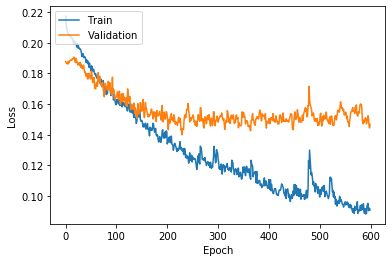

78/78 [==============================] - 0s 3ms/sample - loss: 0.2057
0.20569152786181524


In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(test_X, test_y, batch_size=batch_size)
print(score)

In [11]:
# serialize model to JSON
model_name = 'double_lstm_{}_smooth'.format(epochs)

model_json = model.to_json()
with open("./model/{}.json".format(model_name), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./model/{}.h5".format(model_name))
print("Saved model to disk")

Saved model to disk


In [12]:
test_csvs = glob.glob('/home/zg2309/result/validation*/*/data_smooth.csv')
test_num = len(test_csvs)
# print(test_csvs)
print('test csv num:', len(test_csvs))

for file in test_csvs:
    raw = pd.read_csv(file).values
    length = raw.shape[0]
    padding = np.zeros((max_frame, dim_input + 3))
    padding[:length, :] = raw
    padding = padding[:, :-3]
    
    test_X = np.array([padding])
    prediction = model.predict(test_X)
    prediction = prediction.reshape(-1, 200, 3)
    prediction = prediction[:, :length, :].squeeze()
    prediction_csv = '/'.join(file.split('/')[:-1]) + '/' + model_name + '_prediction.csv'
    np.savetxt(prediction_csv, prediction, delimiter=",")
#     print(prediction_csv)

test csv num: 202
/home/zg2309/result/validation_0004/segment-17860546506509760757_6040_000_6060_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-191862526745161106_1400_000_1420_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-17763730878219536361_3144_635_3164_635/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-1943605865180232897_680_000_700_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-18252111882875503115_378_471_398_471/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-18331704533904883545_1560_000_1580_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-17244566492658384963_2540_000_2560_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0004/segment-17626999143001784258_2760_000_2780_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/v

/home/zg2309/result/validation_0007/segment-7799643635310185714_680_000_700_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-8079607115087394458_1240_000_1260_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-89454214745557131_3160_000_3180_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-8133434654699693993_1162_020_1182_020/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-8331804655557290264_4351_740_4371_740/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-8398516118967750070_3958_000_3978_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0007/segment-8956556778987472864_3404_790_3424_790/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0000/segment-16751706457322889693_4475_240_4495_240_with_camera_labels/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/vali

/home/zg2309/result/validation_0005/segment-2736377008667623133_2676_410_2696_410/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-4409585400955983988_3500_470_3520_470/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-30779396576054160_1880_000_1900_000/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-260994483494315994_2797_545_2817_545/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-3039251927598134881_1240_610_1260_610/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-3126522626440597519_806_440_826_440/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-271338158136329280_2541_070_2561_070/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-366934253670232570_2229_530_2249_530/double_lstm_600_smooth_prediction.csv
/home/zg2309/result/validation_0005/segment-401